Take this dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

1) Build a deep learning model to predict churn rate at bank. 

2) Once model is built, print classification report and analyze precision, recall and f1-score 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1665,1666,15775082,Stewart,749,France,Male,42,1,129776.72,2,0,1,143538.51,0
9824,9825,15658980,Matthews,711,Germany,Male,26,9,128793.63,1,1,0,19262.05,0
182,183,15621075,Ogbonnaya,778,Germany,Female,45,1,162150.42,2,1,0,174531.27,0
6306,6307,15656471,Mitchell,773,France,Male,33,9,0.00,2,1,1,1118.31,0
5975,5976,15758039,Ash,614,France,Male,44,6,0.00,2,0,1,104930.46,0


In [3]:
df.drop(["RowNumber","CustomerId"],axis=1,inplace=True)

In [4]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


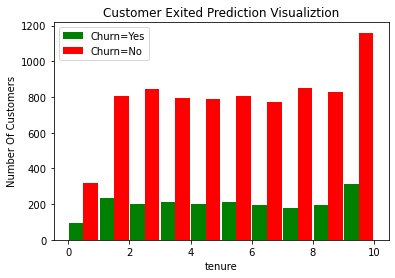

In [5]:
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualiztion")


plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [6]:
df.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.dtypes

Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
for col in df.columns:
    print(f'{col} : {df[col].unique()}')

Surname : ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 56

In [9]:
df.info

<bound method DataFrame.info of         Surname  CreditScore Geography  Gender  Age  Tenure    Balance  \
0      Hargrave          619    France  Female   42       2       0.00   
1          Hill          608     Spain  Female   41       1   83807.86   
2          Onio          502    France  Female   42       8  159660.80   
3          Boni          699    France  Female   39       1       0.00   
4      Mitchell          850     Spain  Female   43       2  125510.82   
...         ...          ...       ...     ...  ...     ...        ...   
9995   Obijiaku          771    France    Male   39       5       0.00   
9996  Johnstone          516    France    Male   35      10   57369.61   
9997        Liu          709    France  Female   36       7       0.00   
9998  Sabbatini          772   Germany    Male   42       3   75075.31   
9999     Walker          792    France  Female   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0    

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [11]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [12]:
cols = ["Surname","CreditScore","Geography","Gender","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary","Exited"]

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
    

In [14]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1115,228,0,0,24,2,0,0,1,1,5068,1
1,1177,217,2,0,23,1,743,0,0,1,5639,0
2,2040,111,0,0,24,8,5793,2,1,0,5707,1
3,289,308,0,0,21,1,0,1,0,0,4704,0
4,1822,459,2,0,25,2,3696,0,1,1,3925,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1999,380,0,1,21,5,0,1,1,0,4827,0
9996,1336,125,0,1,17,10,124,0,1,1,5087,0
9997,1570,318,0,0,18,7,0,0,0,1,2062,1
9998,2345,381,1,1,24,3,427,1,1,0,4639,1


In [15]:
X = df.drop(["Exited","Surname"],axis=1)
y = df["Exited"]

In [16]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [17]:
X_train.shape

(8000, 10)

In [18]:
import tensorflow as tf
from tensorflow import keras

In [19]:
model = keras.Sequential([
    keras.layers.Dense(30,input_shape=(10,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train,y_train,epochs=25)

Epoch 1/25
250/250 [==============================] - 1s 2ms/step - loss: 8.8345 - accuracy: 0.6636
Epoch 2/25
250/250 [==============================] - 0s 2ms/step - loss: 1.9135 - accuracy: 0.6859
Epoch 3/25
250/250 [==============================] - 0s 2ms/step - loss: 1.3984 - accuracy: 0.6995
Epoch 4/25
250/250 [==============================] - 0s 2ms/step - loss: 1.2454 - accuracy: 0.7160
Epoch 5/25
250/250 [==============================] - 0s 2ms/step - loss: 1.4414 - accuracy: 0.7126
Epoch 6/25
250/250 [==============================] - 0s 2ms/step - loss: 1.4384 - accuracy: 0.7053
Epoch 7/25
250/250 [==============================] - 0s 2ms/step - loss: 1.0443 - accuracy: 0.7241
Epoch 8/25
250/250 [==============================] - 0s 2ms/step - loss: 1.0413 - accuracy: 0.7260
Epoch 9/25
250/250 [==============================] - 0s 2ms/step - loss: 1.2421 - accuracy: 0.7136
Epoch 10/25
250/250 [==============================] - 1s 2ms/step - loss: 1.0195 - accuracy: 0.7259

In [20]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 1.1030 - accuracy: 0.5855


[1.1029855012893677, 0.5855000019073486]

In [21]:
y_pred = model.predict(X_test)
y_pred

array([[0.63626385],
       [0.27597415],
       [0.73201966],
       ...,
       [0.54799604],
       [0.13133368],
       [0.76295495]], dtype=float32)

In [22]:
y_p = []
for element in y_pred:
    if element > 0.5:
        y_p.append(1)
    else:
        y_p.append(0)

In [23]:
y_p[:10]

[1, 0, 1, 1, 1, 0, 0, 1, 0, 1]

In [24]:
y_test[:10]

6252    0
4684    0
1731    0
4742    0
4521    0
6340    0
576     0
5202    1
6363    0
439     0
Name: Exited, dtype: int64

Text(69.0, 0.5, 'Truth')

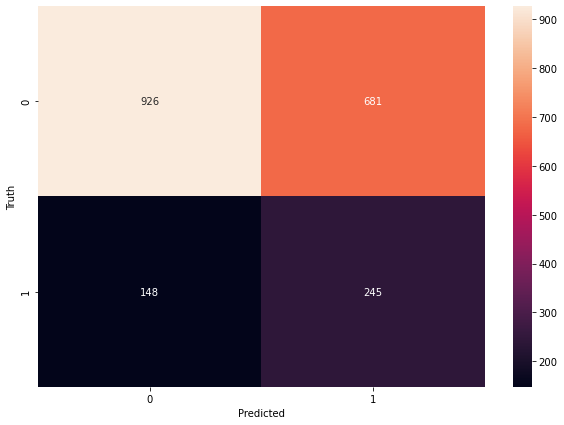

In [25]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_p)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       0.86      0.58      0.69      1607
           1       0.26      0.62      0.37       393

    accuracy                           0.59      2000
   macro avg       0.56      0.60      0.53      2000
weighted avg       0.74      0.59      0.63      2000



In [27]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [31]:
y_train.shape

(8000,)

In [36]:
count_class_0 , count_class_1 = df.Exited.value_counts()

In [32]:
df_class_0 = df[df["Exited"]==0]
df_class_1 = df[df["Exited"]==1]

In [33]:
df_class_0.shape

(7963, 12)

In [38]:
df_class_1.shape, count_class_1

((2037, 12), 2037)

In [39]:
df_class_under_0 = df_class_0.sample(count_class_1)

In [40]:
df_class_under_0.shape

(2037, 12)

In [61]:
df2 = pd.concat([df_class_under_0,df_class_1],axis=0)
X1 = df2.drop(["Exited","Surname"],axis=1)
y1 = df2["Exited"]
from sklearn.model_selection import train_test_split
X1_train , X1_test , y1_train , y1_test = train_test_split(X1 , y1 , test_size=0.2 , random_state=42,stratify=y1)

In [62]:
modelx = keras.Sequential([
    keras.layers.Dense(30,input_shape=(10,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

modelx.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

modelx.fit(X1_train,y1_train,epochs=25)

Epoch 1/25
102/102 [==============================] - ETA: 0s - loss: 196.2699 - accuracy: 0.49 - 1s 2ms/step - loss: 168.6413 - accuracy: 0.4974
Epoch 2/25
102/102 [==============================] - 0s 2ms/step - loss: 3.7607 - accuracy: 0.5649
Epoch 3/25
102/102 [==============================] - 0s 2ms/step - loss: 2.9141 - accuracy: 0.5686
Epoch 4/25
102/102 [==============================] - 0s 2ms/step - loss: 2.5052 - accuracy: 0.5680
Epoch 5/25
102/102 [==============================] - 0s 2ms/step - loss: 2.1809 - accuracy: 0.5815
Epoch 6/25
102/102 [==============================] - 0s 2ms/step - loss: 2.1763 - accuracy: 0.5885
Epoch 7/25
102/102 [==============================] - 0s 2ms/step - loss: 2.3781 - accuracy: 0.5747
Epoch 8/25
102/102 [==============================] - 0s 2ms/step - loss: 1.7272 - accuracy: 0.5956
Epoch 9/25
102/102 [==============================] - 0s 2ms/step - loss: 1.4894 - accuracy: 0.6158
Epoch 10/25
102/102 [==============================] -

In [63]:
y_pred1 = modelx.predict(X1_test)
y_pred1

array([[1.16826475e-01],
       [9.86718059e-01],
       [4.99725342e-04],
       [6.73684478e-03],
       [9.94614661e-01],
       [8.95875812e-01],
       [2.17939466e-01],
       [8.93935621e-01],
       [5.63982725e-02],
       [4.40453053e-01],
       [7.16111362e-02],
       [9.95862961e-01],
       [4.77370232e-01],
       [9.97021198e-01],
       [2.44395941e-01],
       [5.18727839e-01],
       [9.99564707e-01],
       [8.90852869e-01],
       [5.64427435e-01],
       [7.96093583e-01],
       [6.27429485e-01],
       [2.49344707e-02],
       [1.62994623e-01],
       [9.91013050e-02],
       [5.58536530e-01],
       [3.98088992e-01],
       [8.51869583e-04],
       [6.81791902e-01],
       [9.97726321e-01],
       [2.41596699e-02],
       [5.19702971e-01],
       [1.74432993e-04],
       [9.83356893e-01],
       [2.07494825e-01],
       [3.45752835e-01],
       [8.55884433e-01],
       [7.56491601e-01],
       [3.51031840e-01],
       [5.80885887e-01],
       [1.50168359e-01],


In [64]:
modelx.evaluate(X1_test, y1_test)

26/26 [==============================] - 0s 2ms/step - loss: 1.2664 - accuracy: 0.6037


[1.2663984298706055, 0.6036809682846069]

In [68]:
y1_train.value_counts()

1    1630
0    1629
Name: Exited, dtype: int64

In [66]:
y_p1 = []
for element in y_pred1:
    if element > 0.5:
        y_p1.append(1)
    else:
        y_p1.append(0)

In [55]:
from sklearn.metrics import classification_report

print(classification_report(y1_test,y_p1))

              precision    recall  f1-score   support

           0       0.69      0.62      0.65       443
           1       0.59      0.67      0.63       372

    accuracy                           0.64       815
   macro avg       0.64      0.64      0.64       815
weighted avg       0.64      0.64      0.64       815



In [69]:
from imblearn.over_sampling import SMOTE

In [70]:
X2 = df.drop(["Exited","Surname"],axis=1)
y2 = df["Exited"]

In [74]:
smote  = SMOTE(sampling_strategy='minority')
X_sm,y_sm = smote.fit_resample(X2,y2)

In [75]:
y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64